<a href="https://colab.research.google.com/github/lutakrystal305/DL_basic/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X_val, y_val = x_train[40000:, :], y_train[40000:]
X_train, y_train = x_train[:40000], y_train[:40000]
print(X_val.shape)



170508288/170498071 [==============================] - 4s 0us/step
(10000, 32, 32, 3)


In [2]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

#one hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3209 - accuracy: 0.0978 - val_loss: 2.3091 - val_accuracy: 0.1014
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2232 - accuracy: 0.1453 - val_loss: 1.9597 - val_accuracy: 0.2753
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9021 - accuracy: 0.2964 - val_loss: 1.6849 - val_accuracy: 0.3874
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6347 - accuracy: 0.4075 - val_loss: 1.5541 - val_accuracy: 0.4272
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5147 - accuracy: 0.4535 - val_loss: 1.4672 - val_accuracy: 0.4693
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4225 - accuracy: 0.4899 - val_loss: 1.3828 - val_accuracy: 0.5011
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.3339 - accuracy: 0.5237 - val_loss: 1.3136 - val_accuracy:

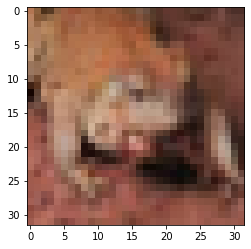

In [9]:
#model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

#optimize loss function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)
score, acc = model.evaluate(X_test, Y_test, verbose=0)
print(score, acc)

fig = plt.figure()

#predict
plt.imshow(X_test[5].reshape(32,32, 3), cmap='gray')

y_predict = model.predict(X_test[5].reshape(1,32,32,3))
print('Gia tri du doan: ', np.argmax(y_predict))
print('Gia tri that: ', y_test[5])